In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
import os

In [2]:
def plot_exposure_effect(df, group):
    
    col1 = sns.color_palette()[2]
    col2 = sns.color_palette()[1]

    
    f14 = np.polyfit(df[(df.group==group) & (df.age_at_move < 4)].age_at_move,
                     df[(df.group==group) & (df.age_at_move < 4)].b, deg=1)
    f511 = np.polyfit(df[(df.group==group) & (df.age_at_move > 4) & (df.age_at_move < 12)].age_at_move,
                      df[(df.group==group) & (df.age_at_move > 4) & (df.age_at_move < 12)].b, deg=1)
    f1218 = np.polyfit(df[(df.group==group) & (df.age_at_move > 11)].age_at_move,
                       df[(df.group==group) & (df.age_at_move > 11)].b, deg=1)
    f111 = np.polyfit(df[(df.group==group) & (df.age_at_move < 12)].age_at_move,
                      df[(df.group==group) & (df.age_at_move < 12)].b, deg=1)
    f114 = np.polyfit(df[(df.group==group) & (df.age_at_move < 15)].age_at_move,
                      df[(df.group==group) & (df.age_at_move < 15)].b, deg=1)
    
    f, ax = plt.subplots(1,1, figsize=(10,6))
    ax.scatter(df[df.group==group].age_at_move,
               df[df.group==group].b)
    
    ax.set_xlabel('age at move',size=15)
    ax.set_ylabel('exposure effect',size=15)
    ax.set_xticks(range(1,19))
    ax.tick_params(axis='both', which='major', labelsize=15)
#     ax.plot(np.arange(1,5), f14[1] + np.arange(1,5)*f14[0], color=col1, label='1-4: slope = {}'.format(np.round(f14[0],3)))
    ax.plot(np.arange(1,12), f111[1] + np.arange(1,12)*f111[0], color=col1, label='1-11: slope = {}'.format(np.round(f111[0],3)))
    ax.plot(np.arange(1,15), f114[1] + np.arange(1,15)*f114[0], color=col1, label='1-14: slope = {}'.format(np.round(f114[0],3)), linestyle='--')
#     ax.plot(np.arange(5,12), f511[1] + np.arange(5,12)*f511[0], color=col1, label='5-11: slope = {}'.format(np.round(f511[0],3)))
    # ax.plot(np.arange(12,19), f1218[1] + np.arange(12,19)*f1218[0], color=col2, label='12-18: slope = {}'.format(np.round(f1218[0],3)))
#     ax.axvline(x=4.5, color='0.5', ls='--')
    ax.axvline(x=11.5, color='0.5', ls=':')
    ax.axhline(y=df[(df.group==group) & (df.age_at_move>11)].b.mean(), color='0.5', ls='--', label=f'selection (age at move > 11) = {df[(df.group==group) & (df.age_at_move>11)].b.mean():.3f}')
#     ax.set_ylim([ymin, ymax])
    
    ymin = df[df.group==group].b.min()
    ymax = df[df.group==group].b.max()
    y11 = (ymin+ymax)/2
    y12 = (2.5*ymin+0.5*ymax)/3
    y13 = (ymin+2*ymax)/3
    
    ax.legend(loc='lower left', bbox_to_anchor=(-0.015,-0.3), ncol=2, frameon=True, 
              fontsize=15)
    
#     ax.text(0.5, y11, 'slope: {}'.format(np.round(f14[0],3)) ,size=15)
#     ax.text(5.5, y12, 'slope: {}'.format(np.round(f511[0],3)) ,size=15)
#     ax.text(12.5, y13, 'slope: {}'.format(np.round(f1218[0],3)) ,size=15)
    
    return f

In [3]:
current_folder = globals()['_dh'][0]
rootdir = os.path.dirname(os.path.dirname(current_folder))
wdir = os.path.join(rootdir, '_2_intermediate', 'data')
outdir = os.path.join(rootdir, '_3_figures_tables', 'data')

In [4]:
df = pd.read_csv(os.path.join(wdir, '_chetty_hendren_results.csv'))
df = df[(df.lhs == 'old') & (df.mg == 'all')].reset_index(drop=True)
# df = df[(df.lhs == 'old') & (df.mg == 'nomg')].reset_index(drop=True)
del df['mg'], df['lhs']
df['group'] = df['group'].str.lower()
df.loc[df.estimation=='household FE', 'estimation'] = 'hh_fe'
df.loc[df.estimation=='overall D_odb', 'estimation'] = 'overall_dodb'

In [5]:
df.estimation.value_counts()

hh_fe           54
girls           54
baseline        54
boys            54
overall_dodb    54
Name: estimation, dtype: int64

In [6]:
df[(df.estimation=="baseline") & (df.age_at_move==1)].N.sum()

273164

In [7]:
df[(df.estimation=="baseline") & (df.age_at_move==1)]

,estimation,group,age_at_move,b,se,N
0,baseline,christian,1,0.850674,0.123132,138300
18,baseline,muslim,1,0.547420,0.138505,127914
36,baseline,traditional,1,-19.787729,1.675455,6950


In [8]:
df[(df.estimation=="overall_dodb") & (df.age_at_move==1)].N.sum()

276686

In [9]:
df[(df.estimation=="overall_dodb") & (df.age_at_move==1)]

,estimation,group,age_at_move,b,se,N
216,overall_dodb,christian,1,0.908139,0.121173,141355
234,overall_dodb,muslim,1,0.553163,0.133437,128215
252,overall_dodb,traditional,1,2.113051,5.125665,7116


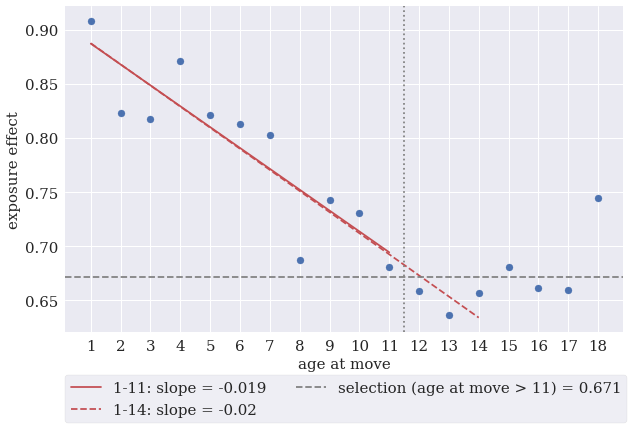

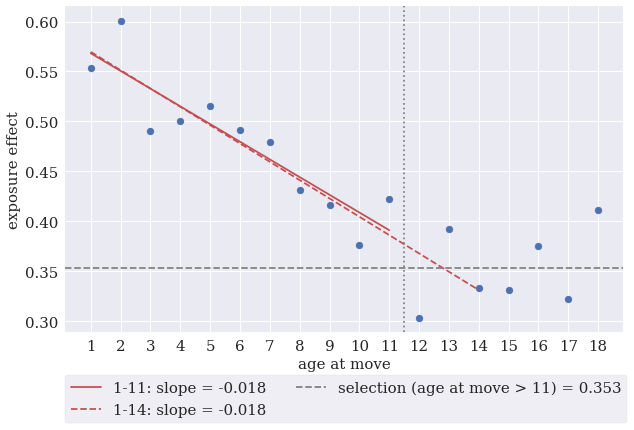

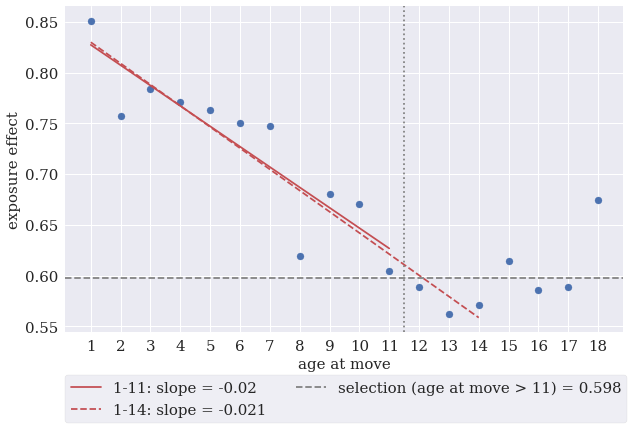

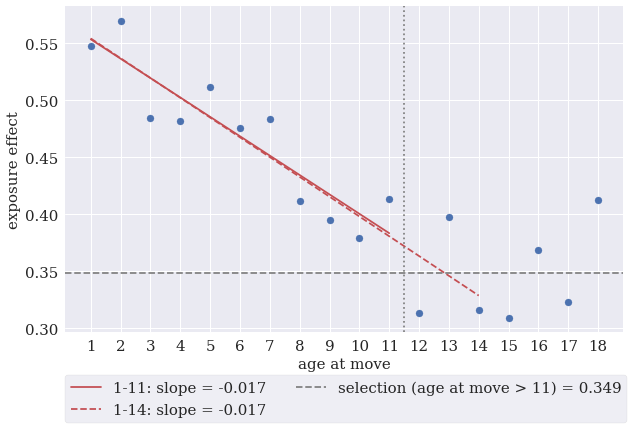

In [10]:
for estimation in ['overall_dodb', 'baseline']:
    df_est = df[df.estimation==estimation]
    
    for group in ['christian', 'muslim']:
        
        f = plot_exposure_effect(df_est, group)

        # f.savefig('{}/_chettyhendren_{}_{}.pdf'.format(outdir, estimation, group),
        #               bbox_inches='tight', dpi=100)
        # plt.close(f)